## Check Datasets

In [22]:
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd

# show all output (not just last)
InteractiveShell.ast_node_interactivity = "all"

# load data
trojan_data = pd.read_csv('./data/Trojan_Detection.csv')

trojan_data.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign


In [23]:
trojan_df = pd.DataFrame(data=trojan_data)
trojan_df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign


In [24]:
trojan_df.isna().sum()
trojan_df.isna().sum().sum()
trojan_df.describe()
trojan_df.info()

Unnamed: 0         0
Flow ID            0
 Source IP         0
 Source Port       0
 Destination IP    0
                  ..
Idle Mean          0
 Idle Std          0
 Idle Max          0
 Idle Min          0
Class              0
Length: 86, dtype: int64

0

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,177482.000000,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,177482.000000,177482.000000,1.774820e+05,177482.000000,...,177482.000000,177482.000000,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05,1.774820e+05
mean,88740.500000,38633.298729,5763.328969,8.295917,1.163310e+07,6.743929,9.908261,811.919496,1.023884e+04,230.168969,...,1.673894,27.802025,1.421356e+05,2.047529e+04,1.617342e+05,1.264388e+05,4.540725e+06,4.024527e+05,4.894188e+06,4.234695e+06
std,51234.784576,18435.832044,15155.981517,4.540501,2.302798e+07,29.655515,106.401351,6055.745405,1.517666e+05,392.025958,...,6.848561,6.652046,7.798898e+05,2.469821e+05,8.791481e+05,7.506803e+05,1.542957e+07,3.246955e+06,1.627581e+07,1.504980e+07
min,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,44370.250000,34156.000000,80.000000,6.000000,4.690050e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,88740.500000,43105.500000,443.000000,6.000000,4.854025e+05,2.000000,1.000000,31.000000,3.100000e+01,31.000000,...,0.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,133110.750000,52135.000000,443.000000,6.000000,1.062035e+07,5.000000,4.000000,451.000000,4.950000e+02,355.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,177481.000000,65530.000000,65267.000000,17.000000,1.199991e+08,4502.000000,12951.000000,846614.000000,1.868497e+07,1460.000000,...,586.000000,60.000000,3.059421e+07,1.993857e+07,4.902243e+07,3.059421e+07,1.197736e+08,7.445182e+07,1.197736e+08,1.197736e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177482 entries, 0 to 177481
Data columns (total 86 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    177482 non-null  int64  
 1   Flow ID                       177482 non-null  object 
 2    Source IP                    177482 non-null  object 
 3    Source Port                  177482 non-null  int64  
 4    Destination IP               177482 non-null  object 
 5    Destination Port             177482 non-null  int64  
 6    Protocol                     177482 non-null  int64  
 7    Timestamp                    177482 non-null  object 
 8    Flow Duration                177482 non-null  int64  
 9    Total Fwd Packets            177482 non-null  int64  
 10   Total Backward Packets       177482 non-null  int64  
 11  Total Length of Fwd Packets   177482 non-null  float64
 12   Total Length of Bwd Packets  177482 non-nul

## Preprocessing

In [25]:
# make copy of data
trojan_df_copy = trojan_df.copy()

# drop first column, and rename target labels to 0 and 1

trojan_df_copy.drop(['Unnamed: 0'], axis=1, inplace=True)
trojan_df_copy.replace('Trojan', 1, inplace=True)
trojan_df_copy.replace('Benign', 0, inplace=True)

trojan_df_copy.head()

/var/folders/_1/xd2p8qjx3b50dbgfvkhxjcl00000gn/T/ipykernel_70470/3269372255.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.replace('Benign', 0, inplace=True)


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,4,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,7,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,10,...,32,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


In [26]:
# drop columns that cannot be found via tcpdump + flow id that is not useful
cols_to_drop = 'Flow ID, Flow IAT Std, Flow IAT Max, Flow IAT Min, Fwd IAT Total, Fwd IAT Mean, Fwd IAT Std, Fwd IAT Max, Fwd IAT Min,Bwd IAT Total, Bwd IAT Std, Bwd IAT Max, Bwd IAT Min,Fwd PSH Flags, Bwd PSH Flags, Fwd URG Flags, Bwd URG Flags, Fwd Header Length, Bwd Header Length,Fwd Packets/s, Bwd Packets/s, Min Packet Length, Max Packet Length, Packet Length Mean, Packet Length Std, Packet Length Variance,FIN Flag Count, SYN Flag Count, RST Flag Count, PSH Flag Count, ACK Flag Count, URG Flag Count, CWE Flag Count, ECE Flag Count, Down/Up Ratio, Average Packet Size, Avg Fwd Segment Size, Avg Bwd Segment Size, Fwd Header Length.1,Fwd Avg Bytes/Bulk, Fwd Avg Packets/Bulk, Fwd Avg Bulk Rate, Bwd Avg Bytes/Bulk, Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets, Subflow Fwd Bytes, Subflow Bwd Packets, Subflow Bwd Bytes,Init_Win_bytes_forward, Init_Win_bytes_backward, act_data_pkt_fwd, min_seg_size_forward,Active Mean, Active Std, Active Max, Active Min,Idle Mean, Idle Std, Idle Max, Idle Min'

drop_list = cols_to_drop.split(',') # no need to strip whitespace bc the csv has them

# drop columns
trojan_df_copy.drop(columns=drop_list, inplace=True)

# strip whitespace from column names
trojan_df_copy.columns = trojan_df_copy.columns.str.strip()

trojan_df_copy.head()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Bwd IAT Mean,Class
0,10.42.0.42,49975,121.14.255.84,80,6,17/07/2017 01:18:33,10743584,4,4,372.0,...,186.000000,672.0,0.0,168.000000,336.000000,97.174276,0.744630,1.534798e+06,3.458470e+06,1
1,10.42.0.42,49169,172.217.6.226,443,17,17/07/2017 10:25:25,254217,6,7,3191.0,...,645.216062,1350.0,30.0,749.428571,678.206423,33188.181750,51.137414,2.118475e+04,3.362333e+04,1
2,10.42.0.42,37749,10.42.0.1,53,17,30/06/2017 07:16:12,1023244,1,1,30.0,...,0.000000,179.0,179.0,179.000000,0.000000,204.252358,1.954568,1.023244e+06,0.000000e+00,0
3,10.42.0.42,41352,10.42.0.1,53,17,13/07/2017 03:48:44,286483,1,1,40.0,...,0.000000,106.0,106.0,106.000000,0.000000,509.628844,6.981217,2.864830e+05,0.000000e+00,1
4,10.42.0.151,44353,107.22.241.77,443,6,05/07/2017 10:47:35,65633087,12,10,767.0,...,130.001719,1448.0,0.0,562.200000,649.538948,97.344195,0.335197,3.125385e+06,7.286915e+06,0


In [27]:
trojan_df_copy.columns
with pd.option_context('display.max_colwidth', None):
    print(trojan_df_copy.head())

Index(['Source IP', 'Source Port', 'Destination IP', 'Destination Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Bwd IAT Mean', 'Class'],
      dtype='object')

     Source IP  Source Port Destination IP  Destination Port  Protocol  \
0   10.42.0.42        49975  121.14.255.84                80         6   
1   10.42.0.42        49169  172.217.6.226               443        17   
2   10.42.0.42        37749      10.42.0.1                53        17   
3   10.42.0.42        41352      10.42.0.1                53        17   
4  10.42.0.151        44353  107.22.241.77               443         6   

             Timestamp  Flow Duration  Total Fwd Packets  \
0  17/07/2017 01:18:33       10743584                  4   
1  17/07/2017 10:25:25         254217                  6   
2  30/06/2017 07:16:12        1023244                  1   
3  13/07/2017 03:48:44         286483                  1   
4  05/07/2017 10:47:35       65633087                 12   

   Total Backward Packets  Total Length of Fwd Packets  ...  \
0                       4                        372.0  ...   
1                       7                       3191.0  ...   
2    

In [28]:
import ipaddress

# convert IP addresses to integers
def ip_to_int(ip):
    return int(ipaddress.IPv4Address(ip))

trojan_df_copy['Source IP'] = trojan_df_copy['Source IP'].apply(ip_to_int)
trojan_df_copy['Destination IP'] = trojan_df_copy['Destination IP'].apply(ip_to_int)

# convert timestamp to unix timestamp
trojan_df_copy['Timestamp'] = pd.to_datetime(trojan_df_copy['Timestamp'], format='%d/%m/%Y %H:%M:%S')
trojan_df_copy['Timestamp'] = trojan_df_copy['Timestamp'].apply(lambda x: x.timestamp())


In [29]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
ohe = OneHotEncoder()

# encode categorical columns
# df_copy['Flow ID'] = le.fit_transform(df_copy['Flow ID'])

# one hot encode protocol column
# protocol_ohe = ohe.fit_transform

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# # scale continuous columns
# continuous_col = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Flow Bytes/s', 'Flow Packets/s']

#### train & test split

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into training and testing sets
X = trojan_df_copy.drop(columns=['Class'])
y = trojan_df_copy['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=20)

# scale data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# print
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(141985, 23)

(35497, 23)

(141985,)

(35497,)

<Figure size 2000x2000 with 0 Axes>

<Axes: >

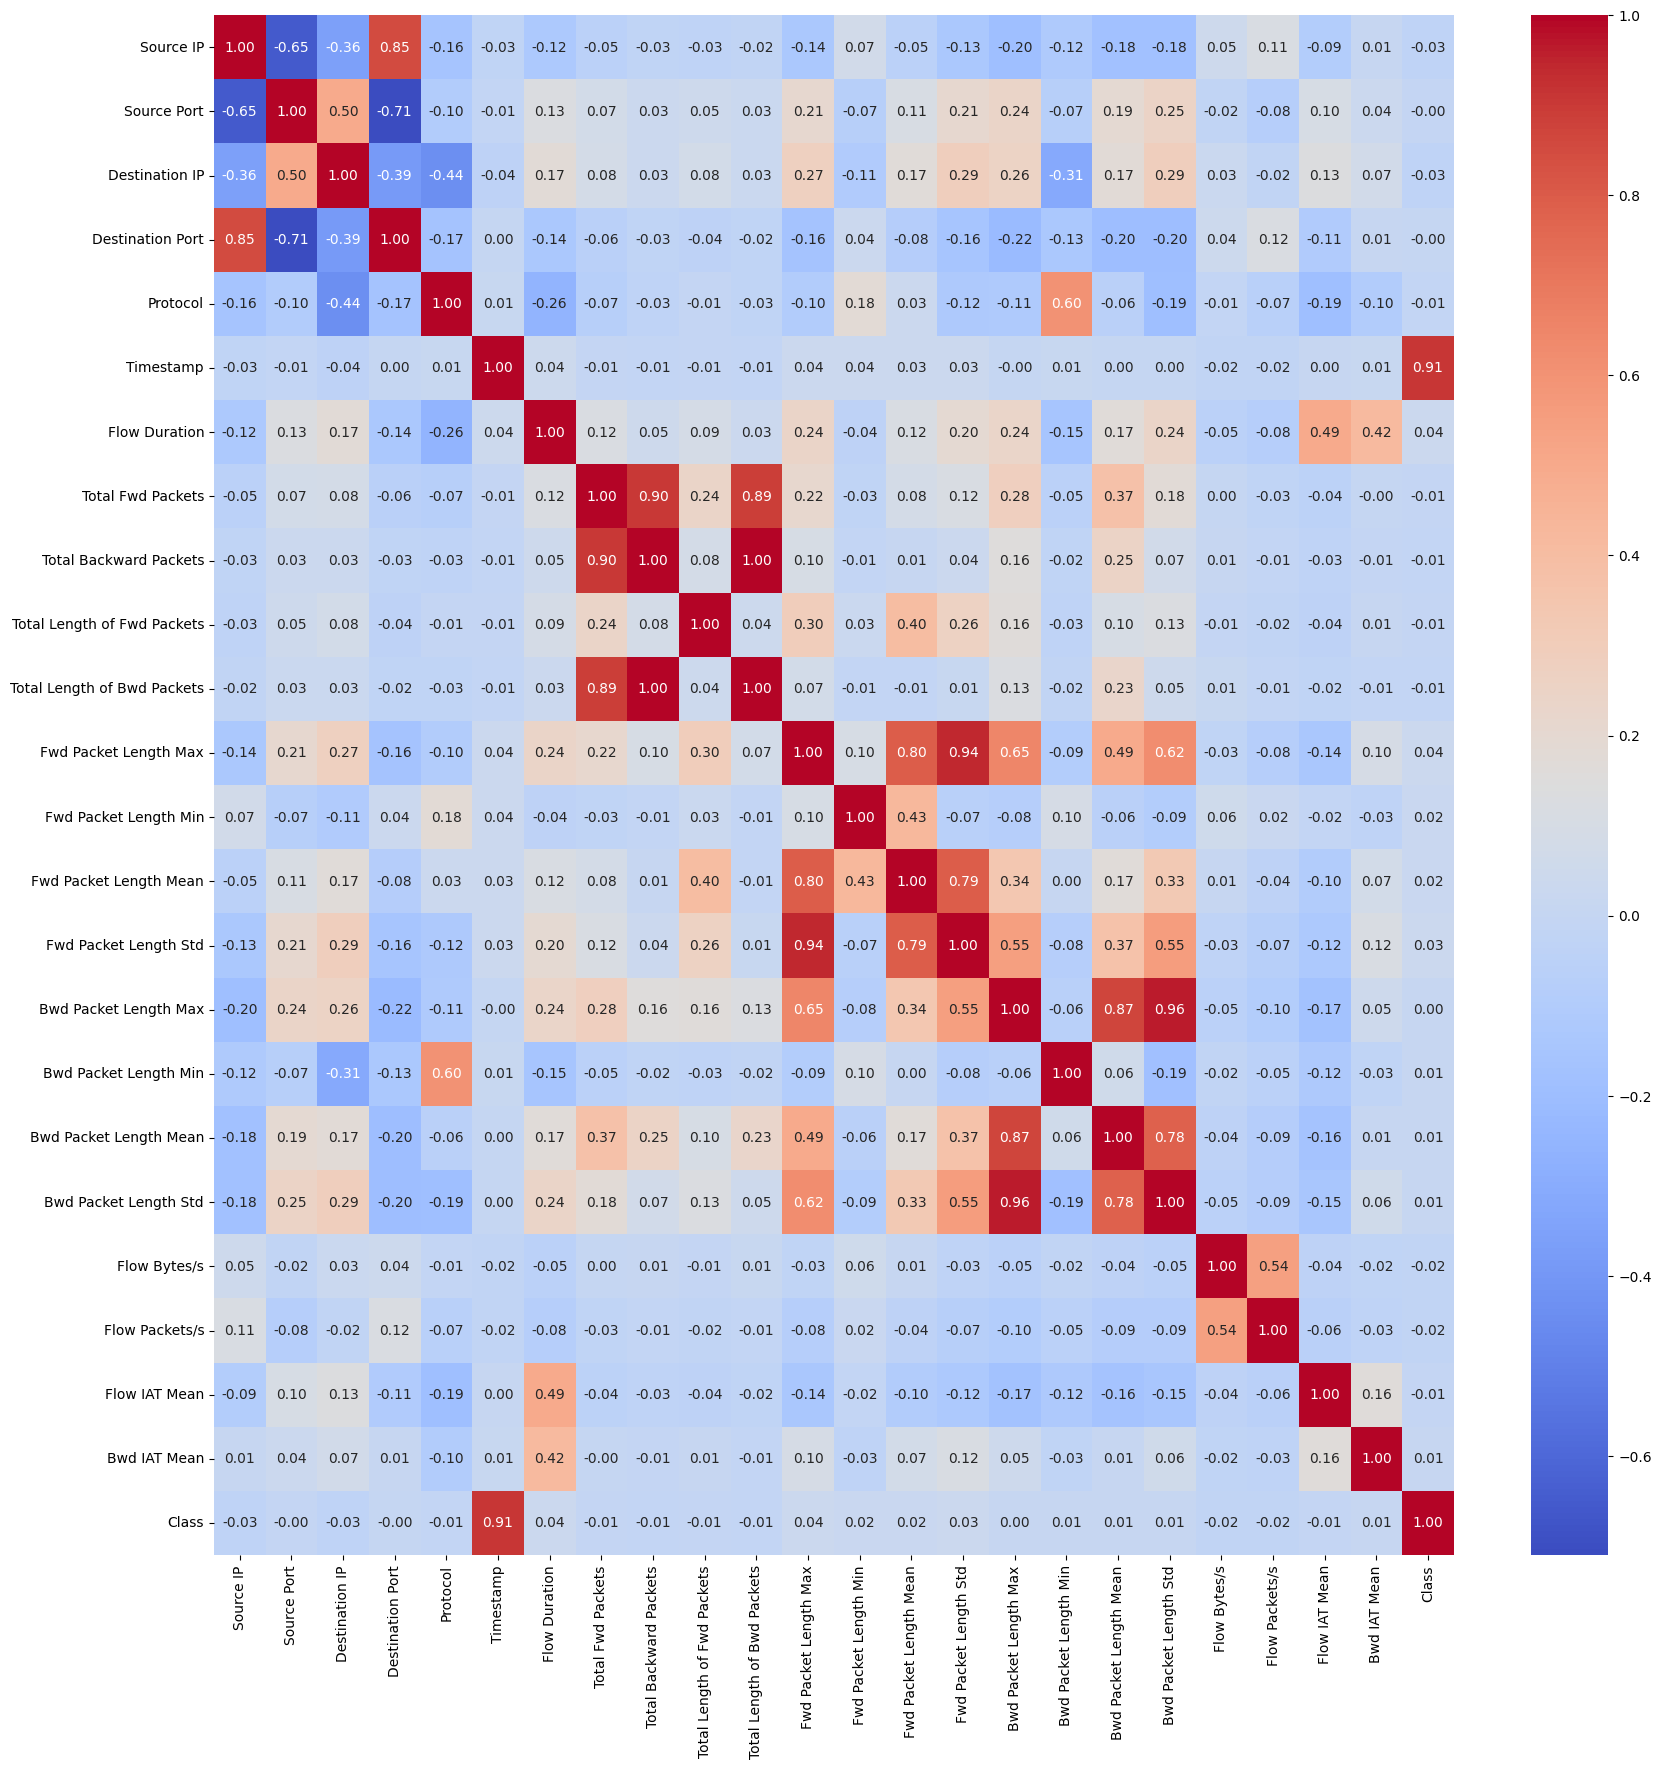

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot correlation matrix
corr = trojan_df_copy.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca.explained_variance_ratio_.sum())

X_train_pca.shape[1]

0.9169988096094575


12

## Model Training

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=20)
rfc.fit(X_train_pca, y_train)

y_pred = rfc.predict(X_test_pca)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


RandomForestClassifier(random_state=20)

0.9941121784939573
[[17347    13]
 [  196 17941]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     17360
           1       1.00      0.99      0.99     18137

    accuracy                           0.99     35497
   macro avg       0.99      0.99      0.99     35497
weighted avg       0.99      0.99      0.99     35497



In [34]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


RandomForestClassifier(random_state=42)

0.998844972814604
[[17360     0]
 [   41 18096]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17360
           1       1.00      1.00      1.00     18137

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497



In [35]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=20)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=20, ...)

0.9999718286052343
[[17360     0]
 [    1 18136]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17360
           1       1.00      1.00      1.00     18137

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497



### siamese default: 0.33

In [75]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K


def build_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    return Model(input, x)

def build_base_network_cnn(input_shape):
    """Builds a base network with CNN layers."""
    input = Input(shape=input_shape)
    
    # First convolutional layer
    x = Conv1D(64, kernel_size=3, activation='relu')(input)  # 64 filters, kernel size 3
    x = Conv1D(64, kernel_size=3, activation='relu')(x)  # Another Conv layer
    
    # Global max pooling layer to reduce dimensionality
    x = GlobalMaxPooling1D()(x)
    
    # Optional: Add a Dense layer
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)  # Output embedding size 32
    
    return Model(input, x)

def euclidean_distance(vectors):
    (featsA, featsB) = vectors
    sumSquared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sumSquared, K.epsilon()))

def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

def create_pairs(X, y):
    normal_samples = X[y == 0]
    anomalous_samples = X[y == 1]
    
    X_a = []
    X_b = []
    y = []

    # Create similar pairs (normal vs. normal, anomalous vs. anomalous)
    for i in range(len(normal_samples) - 1):
        X_a.append(normal_samples[i])
        X_b.append(normal_samples[i + 1])
        y.append(0)  # Similar pair (normal vs. normal)

    for i in range(len(anomalous_samples) - 1):
        X_a.append(anomalous_samples[i])
        X_b.append(anomalous_samples[i + 1])
        y.append(0)  # Similar pair (anomalous vs. anomalous)

    # Create dissimilar pairs (normal vs. anomalous)
    for i in range(len(normal_samples)):
        X_a.append(normal_samples[i])
        X_b.append(anomalous_samples[i % len(anomalous_samples)])  # Pair normal with a random anomaly
        y.append(1)  # Dissimilar pair (normal vs. anomalous)

    # Convert lists to numpy arrays
    return np.array(X_a), np.array(X_b), np.array(y)

# Creating training pairs
X_a_train, X_b_train, y_train_pairs = create_pairs(X_train, y_train)

# Creating testing pairs
X_a_test, X_b_test, y_test_pairs = create_pairs(X_test, y_test)

# Define input shape based on the number of features
input_shape = (X_train.shape[1],)  # Number of features

# Build the Siamese network
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# Build the shared base network
base_network = build_base_network(input_shape)

# Pass inputs through the base network
processed_a = base_network(input_a)
processed_b = base_network(input_b)

# Compute Euclidean distance between the two processed inputs
distance = Lambda(euclidean_distance)([processed_a, processed_b])

# Build the Siamese model
siamese_model = Model(inputs=[input_a, input_b], outputs=distance)

# Compile the model with contrastive loss
siamese_model.compile(optimizer=Adam(), loss=contrastive_loss)

# Train the model
siamese_model.fit([X_a_train, X_b_train], y_train_pairs, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss = siamese_model.evaluate([X_a_test, X_b_test], y_test_pairs)
print(f"Test loss: {test_loss}")

# Predict on test data (distance between pairs)
predictions = siamese_model.predict([X_a_test, X_b_test])
print("Predicted distances:", predictions)


Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/envs/pyenv/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_244', 'keras_tensor_245']. Received: the structure of inputs=('*', '*')
  warnings.warn(


2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 739us/step - loss: 0.1696 - val_loss: 0.7117
Epoch 2/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 676us/step - loss: 0.1532 - val_loss: 0.6828
Epoch 3/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 718us/step - loss: 0.1502 - val_loss: 0.7206
Epoch 4/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step - loss: 0.1494 - val_loss: 0.6834
Epoch 5/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 704us/step - loss: 0.1480 - val_loss: 0.6961
Epoch 6/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - loss: 0.1465 - val_loss: 0.7154
Epoch 7/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 733us/step - loss: 0.1455 - val_loss: 0.7356
Epoch 8/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step - loss: 0.1455 - val_loss: 0.7119
Epoch 9/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 742us/step - loss: 0.1445 - val_loss: 0.7243
Epoch 10/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 2s 661us/step - loss: 0.1433 - val_loss: 0.6980


1652/1652 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - loss: 0.0833
Test loss: 0.25678545236587524
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step
Predicted distances: [[0.772345  ]
 [0.71005756]
 [0.6907696 ]
 ...
 [0.87849903]
 [0.8929275 ]
 [0.986813  ]]


In [65]:
threshold = 0.5
predictions_binary = (predictions > threshold).astype(int)
accuracy = np.mean(predictions_binary == y_test_pairs)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3336649179365558


(array([3.000e+00, 1.100e+01, 9.000e+00, 1.300e+01, 2.100e+01, 1.400e+01,
        3.100e+01, 4.800e+01, 4.100e+01, 7.100e+01, 7.000e+01, 9.000e+01,
        1.070e+02, 1.600e+02, 2.060e+02, 2.790e+02, 3.930e+02, 7.020e+02,
        1.213e+03, 2.110e+03, 3.264e+03, 4.477e+03, 5.274e+03, 5.404e+03,
        4.657e+03, 3.259e+03, 1.916e+03, 9.380e+02, 4.320e+02, 1.610e+02,
        6.100e+01, 1.900e+01, 2.100e+01, 5.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.0356444 , 0.07092523, 0.10620605, 0.14148688, 0.17676771,
        0.21204853, 0.24732935, 0.28261018, 0.317891  , 0.35317183,
        0.38845265, 0.4237335 , 0.45901433, 0.49429515, 0.52957594,
        0.56485677, 0.60013765, 0.63541847, 0.6706993 , 0.70598012,
        0.74126095, 0.77654177, 0.81182259, 0.84710342, 0.88238424,
        0.91766506, 0.95294589, 0.98

(array([1.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 4.000e+00, 1.300e+01,
        3.000e+00, 1.500e+01, 2.000e+01, 3.100e+01, 3.100e+01, 4.000e+01,
        4.900e+01, 6.300e+01, 6.800e+01, 1.240e+02, 1.570e+02, 2.950e+02,
        4.580e+02, 7.300e+02, 1.260e+03, 1.861e+03, 2.241e+03, 2.457e+03,
        2.442e+03, 1.913e+03, 1.361e+03, 8.540e+02, 4.660e+02, 2.270e+02,
        8.600e+01, 4.000e+01, 2.000e+01, 9.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([0.06703695, 0.09989379, 0.13275063, 0.16560747, 0.1984643 ,
        0.23132114, 0.26417798, 0.29703483, 0.32989165, 0.3627485 ,
        0.39560536, 0.42846218, 0.46131903, 0.49417585, 0.52703267,
        0.55988955, 0.59274638, 0.6256032 , 0.65846008, 0.6913169 ,
        0.72417372, 0.75703061, 0.78988743, 0.82274425, 0.85560107,
        0.88845795, 0.92131478, 0.95

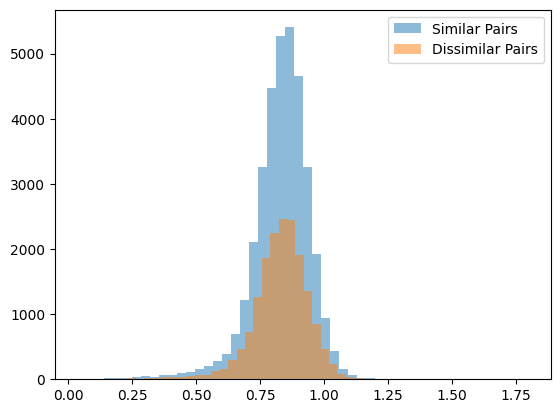

In [42]:
import matplotlib.pyplot as plt
plt.hist(predictions[y_test_pairs == 0], bins=50, alpha=0.5, label='Similar Pairs')
plt.hist(predictions[y_test_pairs == 1], bins=50, alpha=0.5, label='Dissimilar Pairs')
plt.legend(loc='upper right')
plt.show()


### siamese rnn: 0.33

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K


def build_base_rnn(input_shape):
    """Builds the base RNN network for the Siamese network."""
    input = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input)
    x = LSTM(64, return_sequences=False)(input)  # You can also try GRU
    x = Dense(64, activation='relu')(x)
    x = Dense(64, activation='relu')(x)  # Embedding output
    x = Dense(1, activation='relu')(x)
    return Model(input, x)


def euclidean_distance(vectors):
    """Computes the Euclidean distance between two embedding vectors."""
    (featA, featB) = vectors
    sum_squared = K.sum(K.square(featA - featB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_squared, K.epsilon()))

X_a_train = X_a_train.reshape(-1, 1, 23)
X_b_train = X_b_train.reshape(-1, 1, 23)
X_a_test = X_a_test.reshape(-1, 1, 23)
X_b_test = X_b_test.reshape(-1, 1, 23)

# Define the input shape (e.g., 50 time steps, 12 features per step)
input_shape = (1, 23)  # Example for sequences of length 50 with 12 features each

# Create two inputs for the Siamese network
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# Build the base RNN network
base_rnn = build_base_rnn(input_shape)

# Process both inputs using the shared RNN model
processed_a = base_rnn(input_a)
processed_b = base_rnn(input_b)

# Compute the Euclidean distance between the two embeddings
distance = Lambda(euclidean_distance)([processed_a, processed_b])

# Build the full Siamese network
siamese_rnn_model = Model(inputs=[input_a, input_b], outputs=distance)

def contrastive_loss(y_true, y_pred):
    """Contrastive loss function for Siamese network."""
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)


# Compile the Siamese network
siamese_rnn_model.compile(optimizer=Adam(), loss=contrastive_loss, metrics=['accuracy'])

# Assuming you have pre-processed sequential pairs (X_a_train, X_b_train) and labels (y_train_pairs)
siamese_rnn_model.fit([X_a_train, X_b_train], y_train_pairs, 
                      epochs=10, batch_size=64, validation_split=0.2)


# Evaluate on test pairs
test_loss = siamese_rnn_model.evaluate([X_a_test, X_b_test], y_test_pairs)
print(f"Test loss: {test_loss}")

# Predict distances between test pairs
predictions = siamese_rnn_model.predict([X_a_test, X_b_test])
print("Predicted distances:", predictions)



Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/envs/pyenv/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_90', 'keras_tensor_91']. Received: the structure of inputs=('*', '*')
  warnings.warn(


2643/2643 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4611 - loss: 0.3584 - val_accuracy: 0.5325 - val_loss: 0.5864
Epoch 2/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4571 - loss: 0.3519 - val_accuracy: 0.5327 - val_loss: 0.5757
Epoch 3/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4598 - loss: 0.3540 - val_accuracy: 0.5390 - val_loss: 0.6055
Epoch 4/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4547 - loss: 0.3505 - val_accuracy: 0.5814 - val_loss: 0.7385
Epoch 5/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4572 - loss: 0.3509 - val_accuracy: 0.5593 - val_loss: 0.6555
Epoch 6/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4584 - loss: 0.3520 - val_accuracy: 0.5524 - val_loss: 0.6363
Epoch 7/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4557 - loss: 0.3500 - val_accuracy: 0.5611 - val_loss: 0.6683
Epoch 8/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4573 - loss: 0.3513 - val_accurac

1652/1652 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.4788 - loss: 0.3298
Test loss: [0.3966315686702728, 0.48974671959877014]
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step
Predicted distances: [[[0.44140434]]

 [[0.08670291]]

 [[0.08066067]]

 ...

 [[0.88743013]]

 [[0.93361634]]

 [[0.335361  ]]]


(array([1.0000e+01, 1.8000e+01, 3.0000e+01, 4.6000e+01, 6.8000e+01,
        1.1800e+02, 1.7200e+02, 2.7200e+02, 5.0500e+02, 1.1980e+03,
        3.2760e+03, 7.3800e+03, 1.0084e+04, 8.0040e+03, 3.3420e+03,
        8.1500e+02, 1.3800e+02, 1.5000e+01, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.01583149, 0.0816428 , 0.14745411, 0.21326542, 0.27907673,
        0.34488803, 0.41069934, 0.47651064, 0.54232198, 0.60813326,
        0.67394459, 0.73975587, 0.8055672 , 0.87137854, 0.93718982,
        1.00300109, 1.06881249, 1.13462377, 1.20043504, 1.26624632,
        1.33205771, 1.39786899, 1.46368027, 1.

(array([7.000e+00, 1.300e+01, 2.000e+01, 2.000e+01, 5.200e+01, 9.100e+01,
        1.460e+02, 3.150e+02, 7.270e+02, 1.850e+03, 3.699e+03, 4.648e+03,
        3.684e+03, 1.588e+03, 4.150e+02, 7.700e+01, 6.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.12285081, 0.18553007, 0.24820933, 0.31088859, 0.37356785,
        0.43624711, 0.4989264 , 0.56160563, 0.62428492, 0.68696415,
        0.74964345, 0.81232274, 0.87500197, 0.93768126, 1.00036049,
        1.06303978, 1.12571907, 1.18839824, 1.25107753, 1.31375682,
        1.37643611, 1.43911541, 1.50179458, 1.56447387, 1.62715316,
        1.68983245, 1.75251162, 1.81

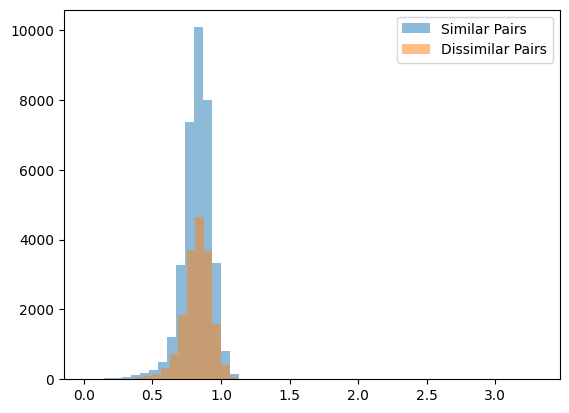

In [76]:
import matplotlib.pyplot as plt
plt.hist(predictions[y_test_pairs == 0], bins=50, alpha=0.5, label='Similar Pairs')
plt.hist(predictions[y_test_pairs == 1], bins=50, alpha=0.5, label='Dissimilar Pairs')
plt.legend(loc='upper right')
plt.show()


In [77]:
threshold = 0.5
predictions_binary = (predictions > threshold).astype(int)
accuracy = np.mean(predictions_binary == y_test_pairs)
print(f"Accuracy: {accuracy}")

Accuracy: 0.3332364785970359


### siamese cnn: 0.67

In [87]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, Dropout, Lambda
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

# Custom initialization (optional)
def initialize_weights(shape, dtype=None):
    return tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)(shape, dtype=dtype)

def initialize_bias(shape, dtype=None):
    return tf.keras.initializers.Constant(value=0.5)(shape, dtype=dtype)

# Define the Siamese model with Conv1D + LSTM layers
def get_siamese_model(input_shape):
    """
    Model architecture inspired by the one in the reference: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    But adapted for 1D convolutional data with LSTM.
    """
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    # Build a sequential Conv1D model for both left and right inputs
    model = Sequential()
    
    # First Conv1D layer (with padding to preserve sequence length)
    model.add(Conv1D(64, 10, activation='relu', padding='same', input_shape=input_shape,
                     kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling1D(pool_size=2))
    
    # Second Conv1D layer (with padding)
    model.add(Conv1D(128, 7, activation='relu', padding='same', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling1D(pool_size=2))
    
    # Third Conv1D layer (with padding)
    model.add(Conv1D(128, 4, activation='relu', padding='same', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling1D(pool_size=2))
    
    # Fourth Conv1D layer (with padding)
    model.add(Conv1D(256, 4, activation='relu', padding='same', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling1D(pool_size=2))

    # Adding the LSTM layer after the CNN layers
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))  # Optional dropout for regularization

    # Flatten the output to feed into fully connected layers
    model.add(Flatten())

    # Fully connected layer with a sigmoid activation
    model.add(Dense(4096, activation='sigmoid', kernel_regularizer=l2(1e-3),
                    kernel_initializer=initialize_weights, bias_initializer=initialize_bias))

    # Process both left and right inputs with the same model (Siamese architecture)
    encoded_l = model(left_input)
    encoded_r = model(right_input)

    # Compute the absolute difference between the encoded representations
    L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    # Final dense layer for prediction (similarity score)
    prediction = Dense(1, activation='sigmoid', bias_initializer=initialize_bias)(L1_distance)

    # Build the Siamese network model
    siamese_net = Model(inputs=[left_input, right_input], outputs=prediction)

    return siamese_net

input_shape = (X_train.shape[1], 1)  # Input shape for Conv1D model

# Get the Siamese model
siamese_model = get_siamese_model(input_shape)

# Compile the model with binary cross-entropy loss and Adam optimizer
siamese_model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model (assuming you have the training pairs X_a_train, X_b_train, and y_train_pairs)
siamese_model.fit([X_a_train, X_b_train], y_train_pairs, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss = siamese_model.evaluate([X_a_test, X_b_test], y_test_pairs)
print(f"Test loss: {test_loss}")

# Predict on test data
predictions = siamese_model.predict([X_a_test, X_b_test])
print("Predicted distances:", predictions)


Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/envs/pyenv/lib/python3.9/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_485', 'keras_tensor_486']. Received: the structure of inputs=('*', '*')
  warnings.warn(


2643/2643 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - loss: 0.4949 - val_loss: 0.5857
Epoch 2/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - loss: 0.4680 - val_loss: 0.6788
Epoch 3/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 0.4668 - val_loss: 0.7713
Epoch 4/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 0.4631 - val_loss: 0.8590
Epoch 5/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - loss: 0.4595 - val_loss: 0.9570
Epoch 6/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 0.4597 - val_loss: 1.0596
Epoch 7/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - loss: 0.4545 - val_loss: 1.1370
Epoch 8/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - loss: 0.4543 - val_loss: 1.2057
Epoch 9/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 37s 14ms/step - loss: 0.4529 - val_loss: 1.2852
Epoch 10/10
2643/2643 ━━━━━━━━━━━━━━━━━━━━ 36s 14ms/step - loss: 0.4519 - val_loss: 1.3451


1652/1652 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3770
Test loss: 0.6524537801742554
1652/1652 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
Predicted distances: [[0.26279902]
 [0.26279902]
 [0.26279902]
 ...
 [0.26279902]
 [0.26279902]
 [0.26279902]]


In [88]:
threshold = 0.5
predictions_binary = (predictions > threshold).astype(int)
accuracy = np.mean(predictions_binary == y_test_pairs)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6715542521994134


(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 35495.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([-0.23720098, -0.21720098, -0.19720097, -0.17720097, -0.15720098,
        -0.13720098, -0.11720098, -0.09720097, -0.07720098, -0.05720098,
        -0.03720098, -0.01720097,  0.00279902,  0.02279902,  0.04279903,
         0.06279902,  0.08279902,  0.10279903,  0.12279902,  0.14279902,
         0.16279903,  0.18279903,  0.20279902,  0.22279902,  0.24279903,
         0.26279902,  0.28279904,  0.30279902,  0.32279903,  0.34279904,
         0.36279902,  0.38279903,  0.40279901,  0.42279902,  0.44279903,
         0.46279901,  0.4827990

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17360.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]),
 array([-0.23720098, -0.21720098, -0.19720097, -0.17720097, -0.15720098,
        -0.13720098, -0.11720098, -0.09720097, -0.07720098, -0.05720098,
        -0.03720098, -0.01720097,  0.00279902,  0.02279902,  0.04279903,
         0.06279902,  0.08279902,  0.10279903,  0.12279902,  0.14279902,
         0.16279903,  0.18279903,  0.20279902,  0.22279902,  0.24279903,
         0.26279902,  0.28279904,  0.30279902,  0.32279903,  0.34279904,
         0.36279902,  0.38279903,  0.40279901,  0.42279902,  0.44279903,
         0.46279901,  0.4827990

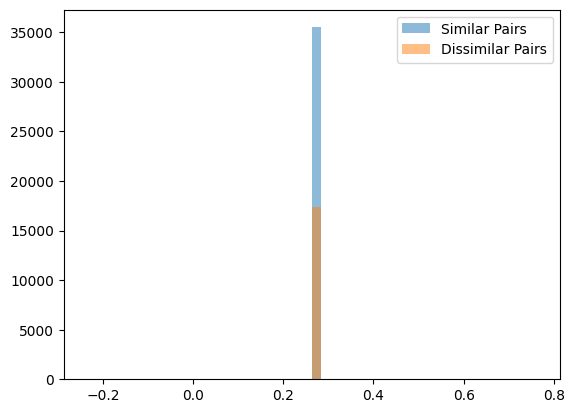

In [89]:
import matplotlib.pyplot as plt
plt.hist(predictions[y_test_pairs == 0], bins=50, alpha=0.5, label='Similar Pairs')
plt.hist(predictions[y_test_pairs == 1], bins=50, alpha=0.5, label='Dissimilar Pairs')
plt.legend(loc='upper right')
plt.show()


### cnn+rnn: 0.442

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, Flatten, Lambda
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

# Custom initialization (optional)
def initialize_weights(shape, dtype=None):
    return tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01)(shape, dtype=dtype)

def initialize_bias(shape, dtype=None):
    return tf.keras.initializers.Constant(value=0.5)(shape, dtype=dtype)

# Define the CNN + LSTM base network for Siamese architecture
def build_cnn_lstm_base(input_shape):
    model = Sequential()

    # First Conv1D Layer
    model.add(Conv1D(32, 4, strides=2, padding='valid', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    
    # Second Conv1D Layer
    model.add(Conv1D(64, 4, strides=2, padding='valid', activation='relu'))
    model.add(BatchNormalization())
    
    # LSTM Layer
    model.add(LSTM(100, return_sequences=False))
    model.add(Dropout(0.2))
    
    # First Fully Connected Layer
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.4))
    
    # Second Fully Connected Layer
    model.add(Dense(108, activation='relu'))
    
    return model

def euclidean_distance(vectors):
    """Computes the Euclidean distance between two embedding vectors."""
    (featsA, featsB) = vectors
    sum_squared = K.sum(K.square(featsA - featsB), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_squared, K.epsilon()))

def contrastive_loss(y_true, y_pred):
    """Contrastive loss function for Siamese network."""
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

# Build the Siamese network using the CNN+LSTM base
def get_siamese_model(input_shape):
    left_input = Input(input_shape)
    right_input = Input(input_shape)

    # Shared CNN+LSTM base model
    base_network = build_cnn_lstm_base(input_shape)

    # Encode both inputs
    encoded_l = base_network(left_input)
    encoded_r = base_network(right_input)

    # Compute the Euclidean distance between the encoded representations
    L1_layer = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])

    # Output layer: similarity score
    prediction = Dense(1, activation='sigmoid')(L1_distance)

    # Siamese network
    siamese_net = Model(inputs=[left_input, right_input], outputs=prediction)

    return siamese_net

# Example input shape (assuming 23 features per sample, and a single channel)
input_shape = (23, 1)

# Get the Siamese model
siamese_model = get_siamese_model(input_shape)

# Compile the model
siamese_model.compile(optimizer='adam', loss=contrastive_loss)

# Train the model (assuming you have training pairs X_a_train, X_b_train, and y_train_pairs)
siamese_model.fit([X_a_train, X_b_train], y_train_pairs, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss = siamese_model.evaluate([X_a_test, X_b_test], y_test_pairs)
print(f"Test loss: {test_loss}")

# Predict on test data
predictions = siamese_model.predict([X_a_test, X_b_test])
print("Predicted distances:", predictions)


ValueError: Input 0 of layer "conv1d_17" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 100)

In [80]:
threshold = 0.5
predictions_binary = (predictions > threshold).astype(int)
accuracy = np.mean(predictions_binary == y_test_pairs)
print(f"Accuracy: {accuracy}")

Accuracy: 0.4427351873700832


In [90]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dropout

# Define a simple RNN model
def build_rnn_model(input_shape):
    model = Sequential()

    # Add a SimpleRNN layer
    model.add(SimpleRNN(100, activation='tanh', input_shape=input_shape, return_sequences=False))
    
    # Add Dropout for regularization
    model.add(Dropout(0.2))
    
    # Fully connected layer
    model.add(Dense(64, activation='relu'))
    
    # Output layer for binary classification (or adjust the output depending on your task)
    model.add(Dense(1, activation='sigmoid'))

    return model

# Input shape definition (for example, a sequence length of 23, with 1 feature per timestep)
input_shape = (23, 1)

# Build the RNN model
rnn_model = build_rnn_model(input_shape)

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
rnn_model.summary()

# Assuming you have training data X_train and y_train
# Reshape input data to fit the RNN (batch_size, sequence_length, num_features)
# For example: (samples, 23, 1) for time series or sequence data
rnn_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = rnn_model.evaluate(X_test, y_test)

print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")


from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
rnn_model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])



/opt/homebrew/Caskroom/miniconda/base/envs/pyenv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,729 (65.35 KB)

 Trainable params: 16,729 (65.35 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9782 - loss: 0.0785 - val_accuracy: 0.9906 - val_loss: 0.0448
Epoch 2/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9903 - loss: 0.0449 - val_accuracy: 0.9916 - val_loss: 0.0404
Epoch 3/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9922 - loss: 0.0380 - val_accuracy: 0.9919 - val_loss: 0.0385
Epoch 4/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0396 - val_accuracy: 0.9921 - val_loss: 0.0385
Epoch 5/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9916 - loss: 0.0398 - val_accuracy: 0.9920 - val_loss: 0.0385
Epoch 6/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9926 - loss: 0.0368 - val_accuracy: 0.9922 - val_loss: 0.0381
Epoch 7/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9924 - loss: 0.0375 - val_accuracy: 0.9922 - val_loss: 0.0386
Epoch 8/10
1775/1775 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0376 - 

1110/1110 ━━━━━━━━━━━━━━━━━━━━ 1s 800us/step - accuracy: 0.9929 - loss: 0.0345
Test loss: 0.035009995102882385
Test accuracy: 0.9928726553916931
